### Exploratory Data Analysis (EDA)

In [1]:
# =========================
# Step 1: Load dataset & initial inspection
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

In [2]:
train = pd.read_csv("training_loan_data.csv")
train.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           199121 non-null  int64  
 1   member_id                    189457 non-null  float64
 2   loan_amnt                    199121 non-null  int64  
 3   term                         189457 non-null  object 
 4   int_rate                     189457 non-null  object 
 5   emp_length                   181531 non-null  object 
 6   home_ownership               189457 non-null  object 
 7   annual_inc                   189457 non-null  float64
 8   desc                         82004 non-null   object 
 9   purpose                      189457 non-null  object 
 10  percent_bc_gt_75             180419 non-null  float64
 11  bc_util                      180333 non-null  float64
 12  dti                          189457 non-null  float64
 13 

In [4]:
train.describe()

,id,member_id,loan_amnt,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
count,1.991210e+05,1.894570e+05,199121.000000,1.894570e+05,180419.000000,180333.000000,189457.000000,189457.000000,161472.000000,181962.000000,32749.000000,181962.000000,1.617160e+05,199121.0,199121.000000,189457.000000
mean,1.009857e+07,5.929626e+06,14071.947334,7.224330e+04,53.575807,66.840867,17.061084,0.803549,6.993634,20239.424699,41.780054,20238.384308,1.373215e+05,1.0,183.967954,0.069293
std,5.704397e+04,3.339822e+06,8067.076636,5.180483e+04,34.153946,26.111490,7.596941,1.032936,5.879707,18879.795379,20.984599,18941.591779,1.507358e+05,0.0,104.858324,0.253952
min,1.000000e+07,1.515360e+05,1000.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0,14.000000,0.000000
25%,1.004958e+07,2.308792e+06,8000.000000,4.500000e+04,25.000000,49.500000,11.340000,0.000000,2.000000,7800.000000,25.000000,7834.720066,2.746575e+04,1.0,105.000000,0.000000
50%,1.009823e+07,6.060627e+06,12000.000000,6.200000e+04,50.000000,72.200000,16.780000,0.000000,6.000000,14700.000000,41.000000,14637.479485,8.076050e+04,1.0,157.000000,0.000000
75%,1.014801e+07,8.727745e+06,19600.000000,8.700000e+04,80.000000,89.000000,22.580000,1.000000,11.000000,26500.000000,58.000000,26397.825272,2.082122e+05,1.0,256.000000,0.000000
max,1.019779e+07,1.209899e+07,35000.000000,7.141778e+06,100.000000,339.600000,34.990000,8.000000,24.000000,522210.000000,165.000000,520643.298200,8.000078e+06,1.0,456.000000,1.000000


In [5]:
# =========================
# Step 2: Data quality check
# =========================

# Drop rows where target (bad_flag) is missing
train = train.dropna(subset=["bad_flag"])

# Check missing values
missing = train.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(train) * 100).round(2)
print(pd.DataFrame({'Missing Values': missing, 'Missing %': missing_pct}))

                             Missing Values  Missing %
mths_since_last_major_derog          156708      82.71
desc                                 107453      56.72
mths_since_recent_inq                 27985      14.77
tot_cur_bal                           27741      14.64
bc_util                                9124       4.82
percent_bc_gt_75                       9038       4.77
emp_length                             7926       4.18
tot_hi_cred_lim                        7495       3.96
total_bc_limit                         7495       3.96
revol_util                              127       0.07
inq_last_6mths                            0       0.00
internal_score                            0       0.00
application_approved_flag                 0       0.00
id                                        0       0.00
dti                                       0       0.00
member_id                                 0       0.00
purpose                                   0       0.00
annual_inc

In [6]:
# Check unique values in some important categorical/numerical columns
print("emp_length unique values:")
print(train["emp_length"].unique())

print("\n term unique values:")
print(train["term"].unique())

print("\n int_rate values (first 10):")
print(train["int_rate"].head(10))

print("\n home ownership unique values:")
print(train["home_ownership"].unique())

emp_length unique values:
['3 years' '10+ years' '4 years' '5 years' '2 years' '7 years' '6 years'
 '1 year' '9 years' '< 1 year' '8 years' nan]

 term unique values:
[' 36 months' ' 60 months']

 int_rate values (first 10):
0    16.24%
1    10.99%
2    10.99%
3     7.62%
4    13.53%
5    22.90%
6    10.99%
7     9.67%
8    13.53%
9    19.97%
Name: int_rate, dtype: object

 home ownership unique values:
['RENT' 'OWN' 'MORTGAGE' 'NONE' 'OTHER']


In [7]:
# =========================
# Step 2a: Data cleaning
# =========================

# Clean emp_length
def clean_emp_length(val):
    if pd.isnull(val): # treat null value as 0 year of employment
        return 0       
    if val == "10+ years":
        return 10
    if val == "< 1 year":
        return 0.5
    return float(val.split()[0])
    
train["emp_length"] = train["emp_length"].apply(clean_emp_length)

In [8]:
# Create a flag for whether the borrower ever had a major derogatory
train["has_derog"] = train["mths_since_last_major_derog"].notnull().astype(int)     

In [9]:
# Clean mths_since_recent_inq
# Replace NaN with a value larger than the maximum observed to indicate “no inquiries”
train["mths_since_recent_inq"] = train["mths_since_recent_inq"].fillna(99)

In [10]:
# Clean tot_cur_bal
# Impute 0 and create a flag
train["has_tot_cur_bal"] = train["tot_cur_bal"].notnull().astype(int)
train["tot_cur_bal"] = train["tot_cur_bal"].fillna(0)

In [11]:
# Clean int_rate
train["int_rate"] = train["int_rate"].str.replace('%', '', regex=False).astype(float)

In [12]:
# Clean term
train["term"] = train["term"].str.extract(r'(\d+)').astype(int)

In [13]:
# Clean revol_util
train["revol_util"] = train["revol_util"].str.replace('%', '', regex=False).astype(float)

In [14]:
# Drop columns that won't be used
train = train.drop(columns=["id", "member_id", "desc", "mths_since_last_major_derog"])

In [15]:
# Fill other numerical columns with median
for col in ["percent_bc_gt_75", "bc_util", "revol_util", "total_bc_limit", "tot_hi_cred_lim"]:
    median_val = train[col].median()
    train[col] = train[col].fillna(median_val)

In [16]:
print("\nMissing values after cleaning:")
print(train.isnull().sum())


Missing values after cleaning:
loan_amnt                    0
term                         0
int_rate                     0
emp_length                   0
home_ownership               0
annual_inc                   0
purpose                      0
percent_bc_gt_75             0
bc_util                      0
dti                          0
inq_last_6mths               0
mths_since_recent_inq        0
revol_util                   0
total_bc_limit               0
tot_hi_cred_lim              0
tot_cur_bal                  0
application_approved_flag    0
internal_score               0
bad_flag                     0
has_derog                    0
has_tot_cur_bal              0
dtype: int64


In [17]:
# =========================
# Step 2b: Outlier detection
# =========================
# List of numeric columns to check for outliers
numeric_cols = [
    "loan_amnt", "int_rate", "annual_inc", "dti", "total_bc_limit", "tot_hi_cred_lim", "tot_cur_bal", "internal_score"
]

for col in numeric_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

loan_amnt: 0 outliers
int_rate: 0 outliers
annual_inc: 7550 outliers
dti: 0 outliers
total_bc_limit: 11272 outliers
tot_hi_cred_lim: 11290 outliers
tot_cur_bal: 6478 outliers
internal_score: 0 outliers


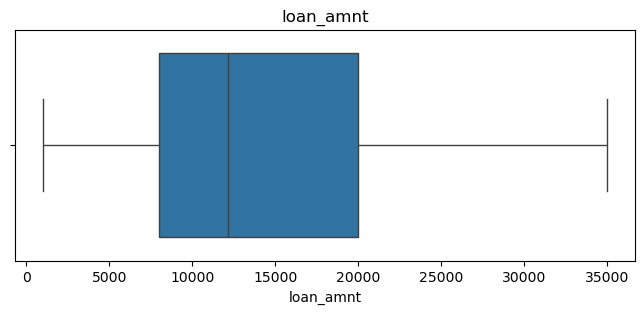

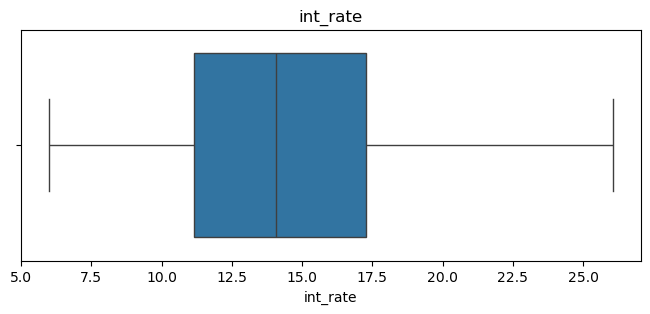

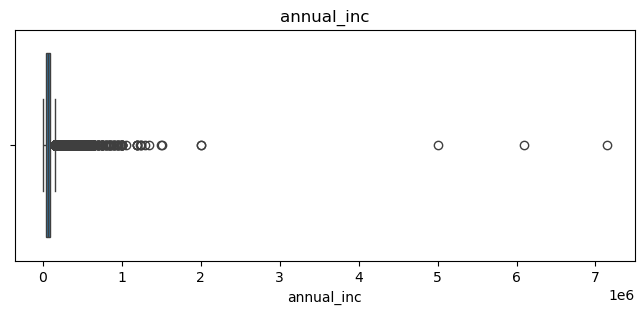

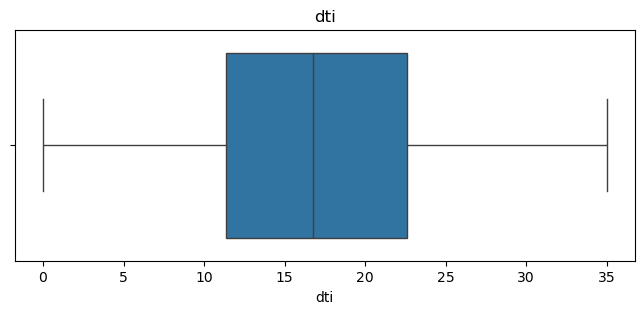

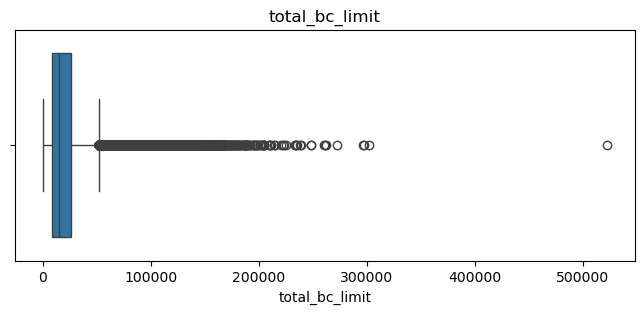

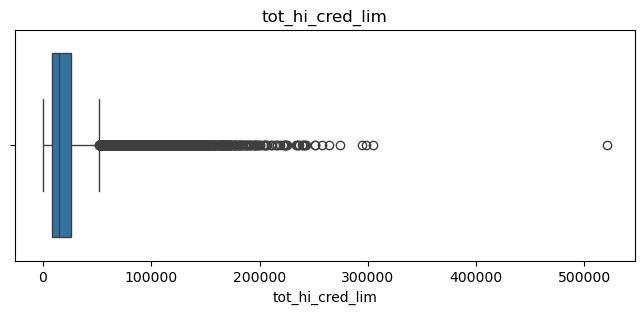

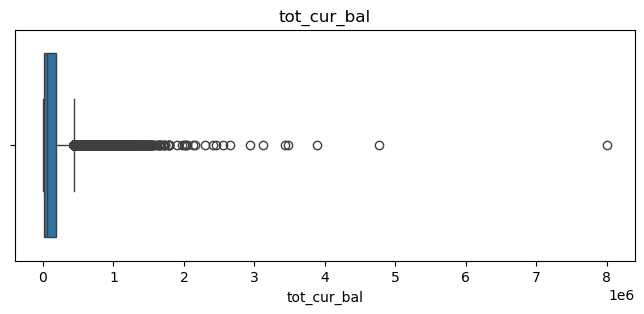

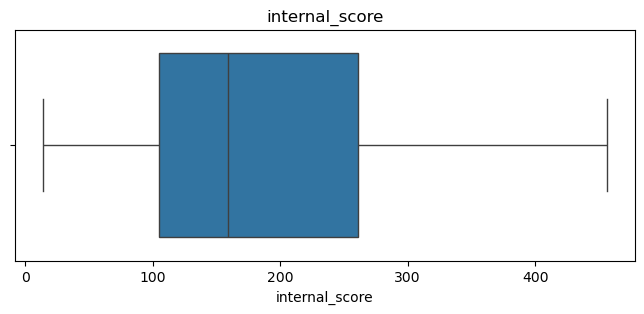

In [18]:
# Create box plots to visualize
for col in numeric_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=train[col])
    plt.title(col)
    plt.show()

In [19]:
# Log-transform to reduce skew
log_cols = ["annual_inc", "total_bc_limit", "tot_hi_cred_lim", "tot_cur_bal"]

for col in log_cols:
    train[col + "_log"] = np.log1p(train[col])

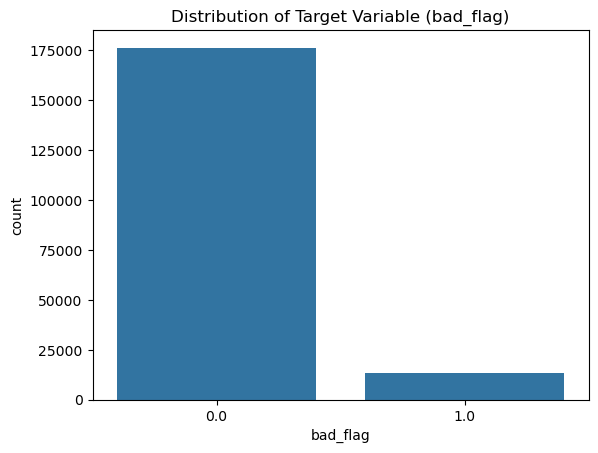

Percentage of defaults: 6.93%


In [20]:
# =========================
# Step 3: Data visualization
# =========================
sns.countplot(x="bad_flag", data=train)
plt.title("Distribution of Target Variable (bad_flag)")
plt.show()

# Calculate the percentage of defaults
bad_pct = train["bad_flag"].mean() * 100
print(f"Percentage of defaults: {bad_pct:.2f}%")

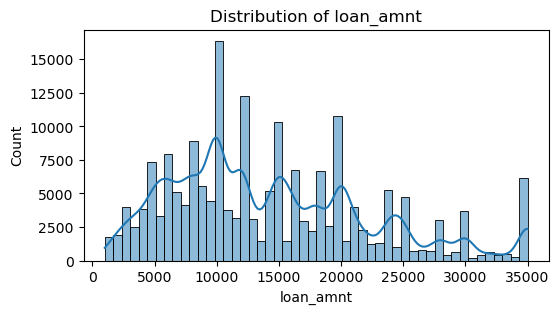

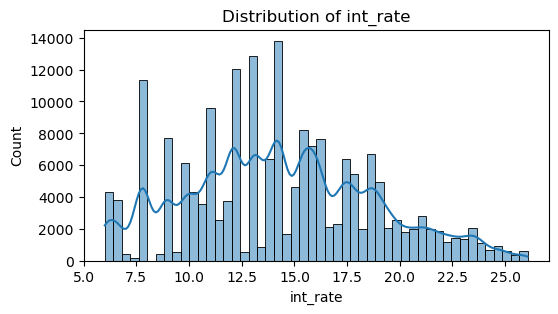

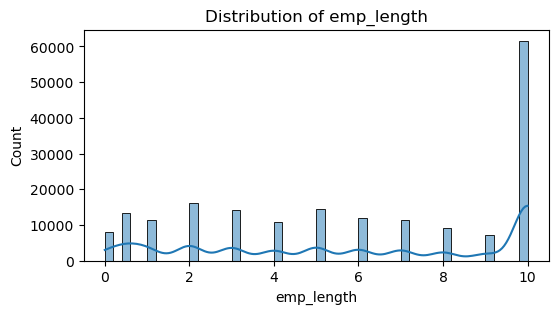

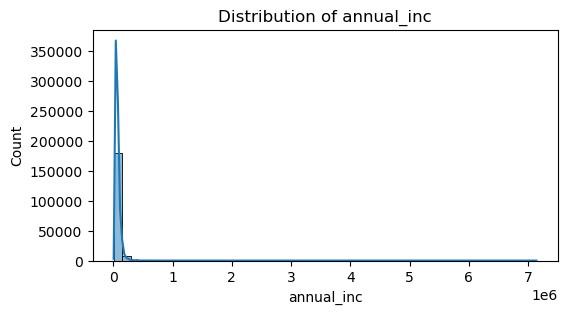

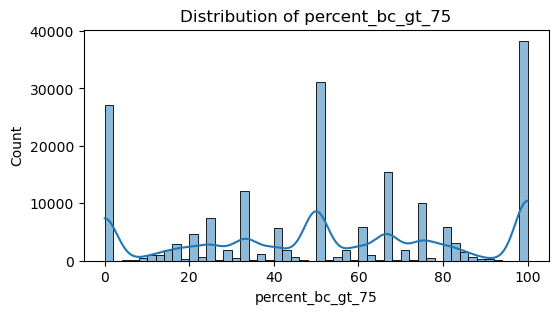

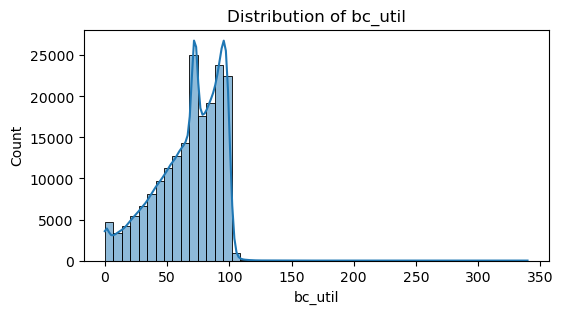

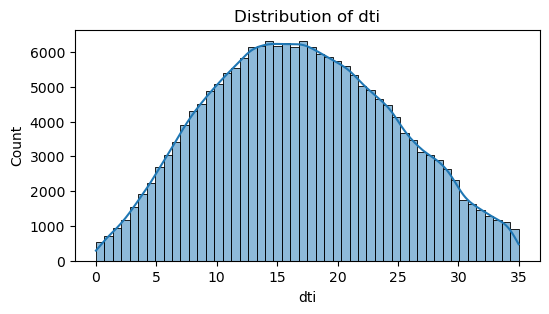

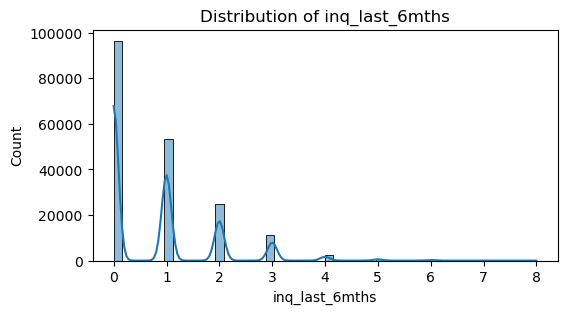

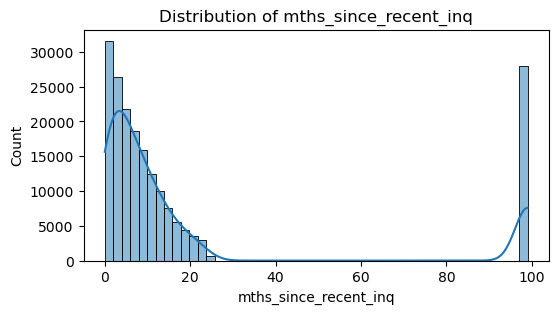

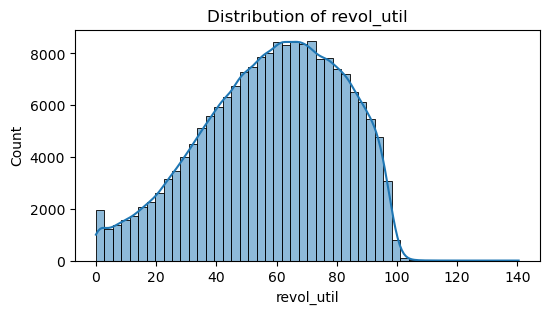

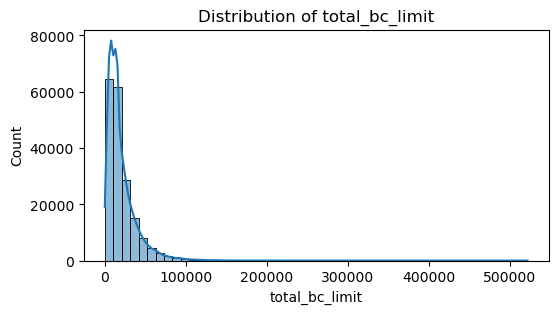

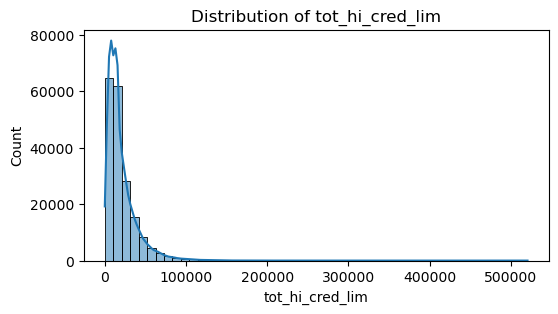

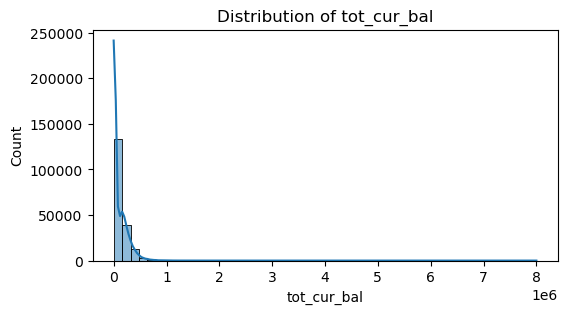

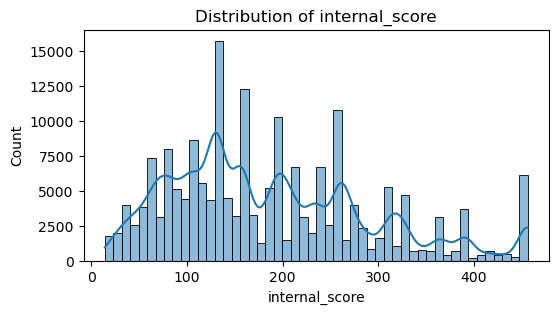

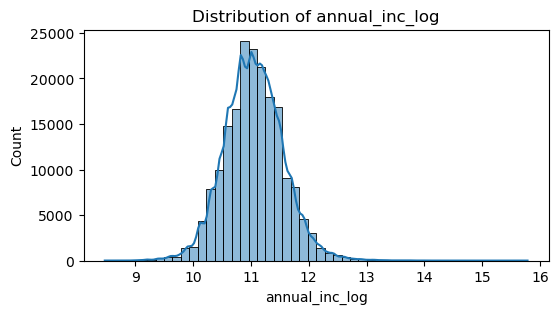

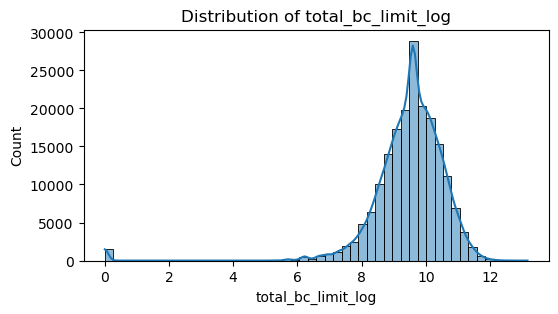

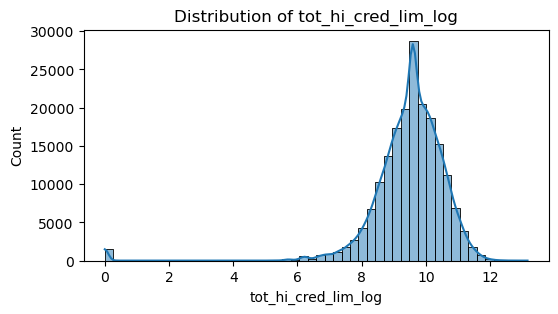

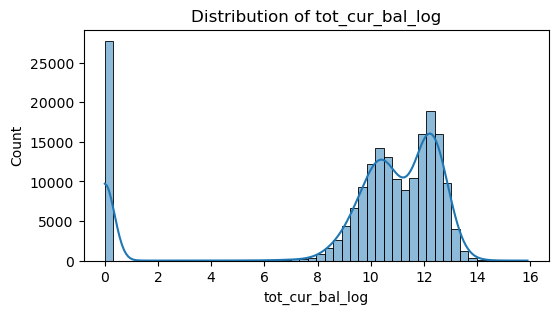

In [21]:
# Distribution plots
num_cols = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'percent_bc_gt_75', 'bc_util', 'dti',
       'inq_last_6mths', 'mths_since_recent_inq', 'revol_util', 'total_bc_limit', 'tot_hi_cred_lim', 'tot_cur_bal',
       'internal_score',  'annual_inc_log', 'total_bc_limit_log', 'tot_hi_cred_lim_log', 'tot_cur_bal_log']
cat_cols = ['term', 'home_ownership', 'purpose', 'has_derog', 'has_tot_cur_bal']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(train[col], kde=True, bins=50)
    plt.title(f"Distribution of {col}")
    plt.show()

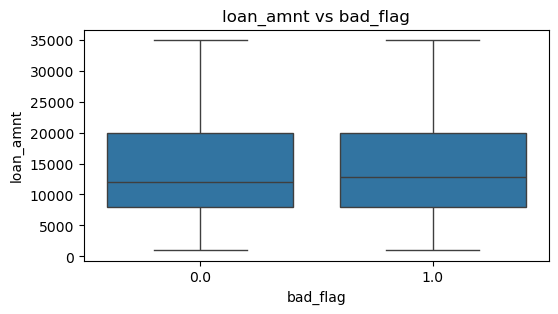

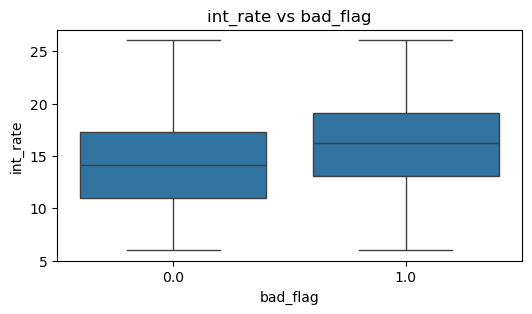

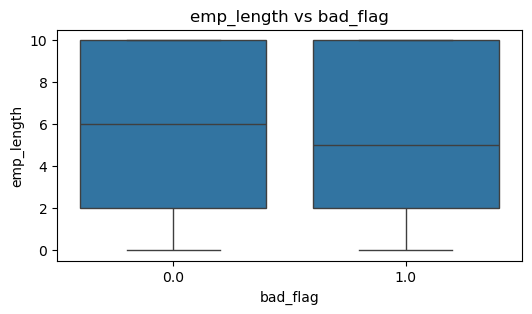

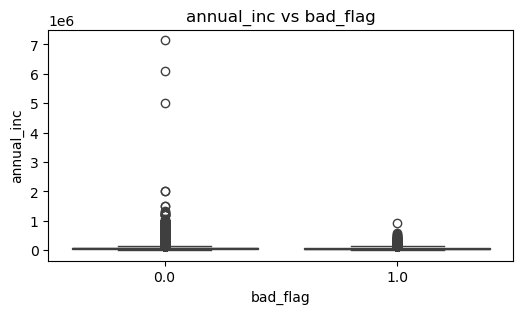

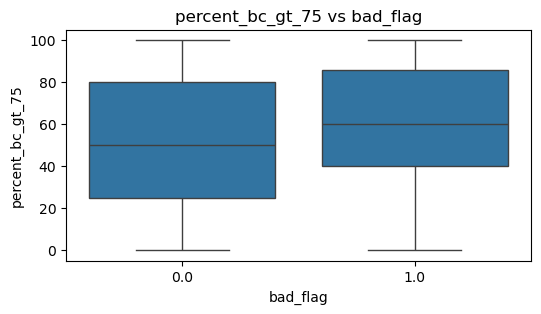

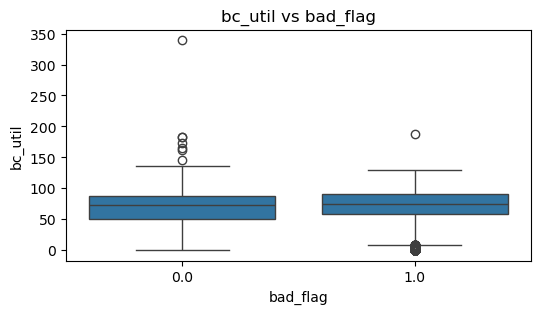

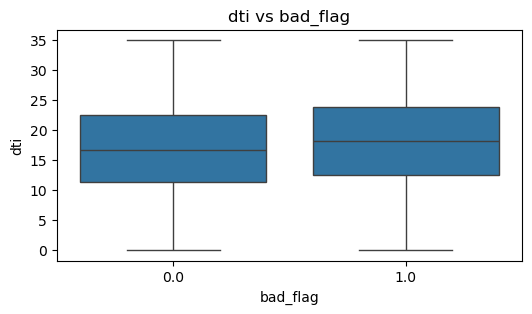

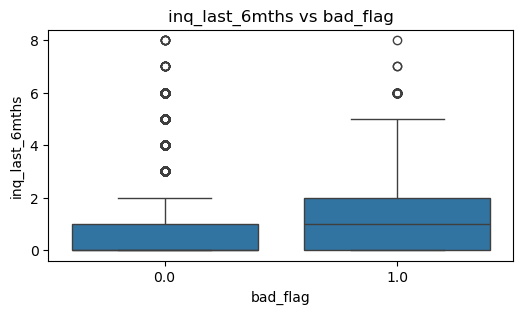

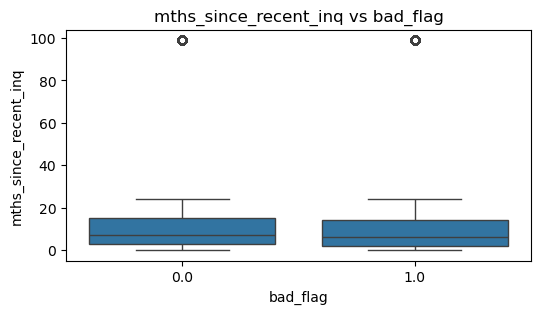

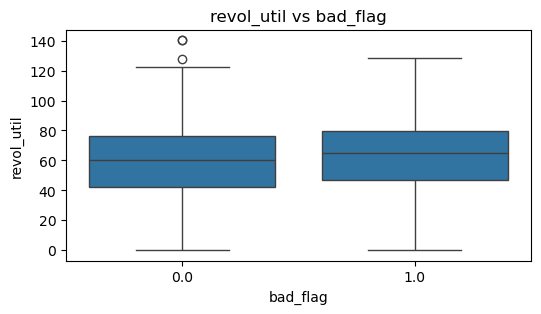

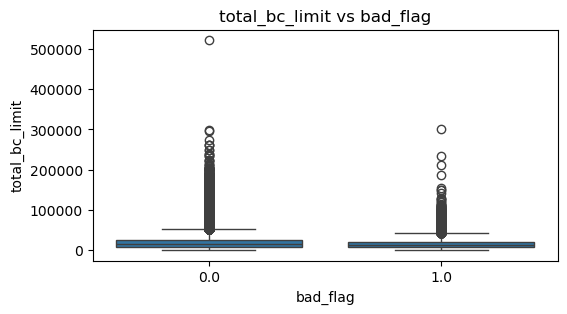

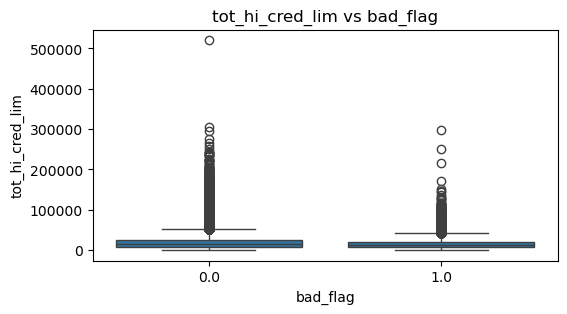

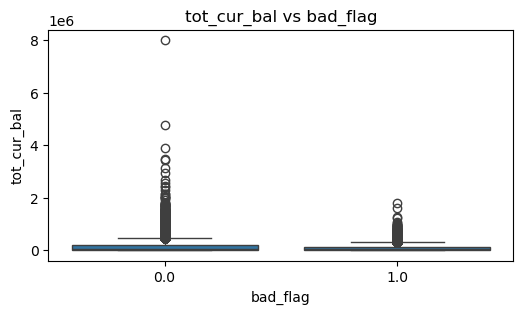

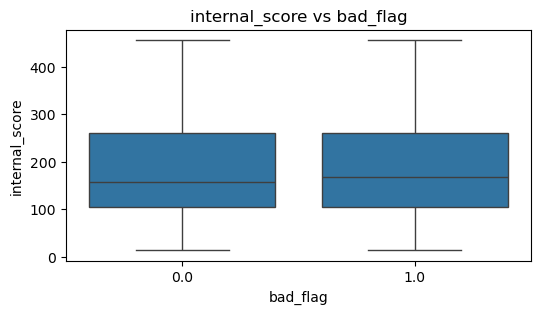

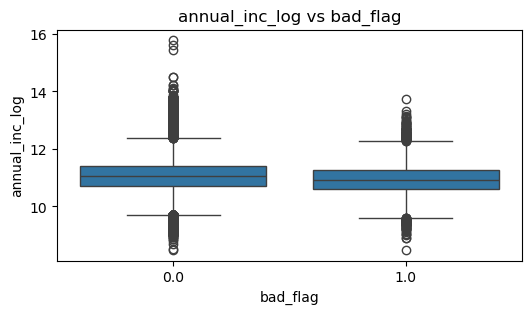

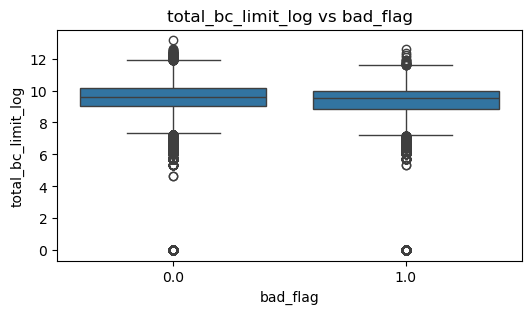

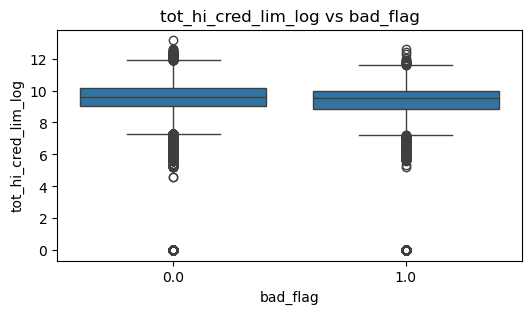

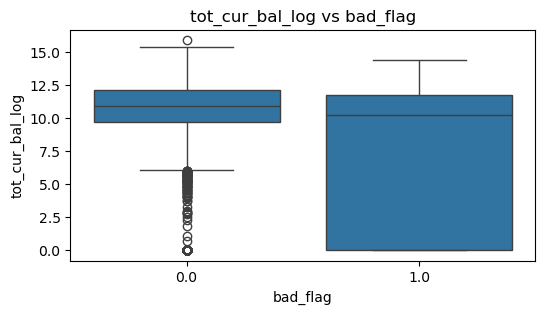

In [22]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x="bad_flag", y=col, data=train)
    plt.title(f"{col} vs bad_flag")
    plt.show()

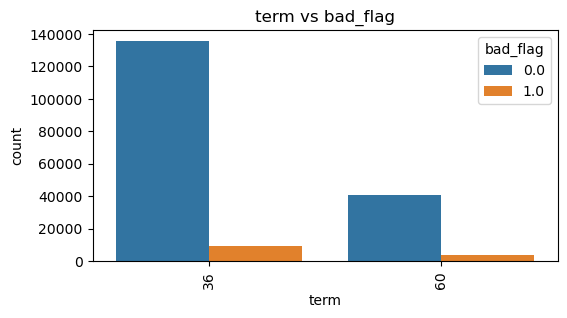

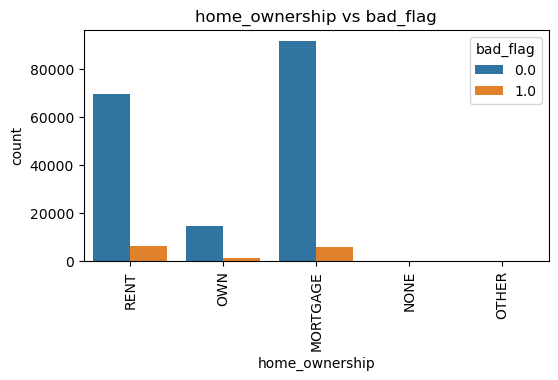

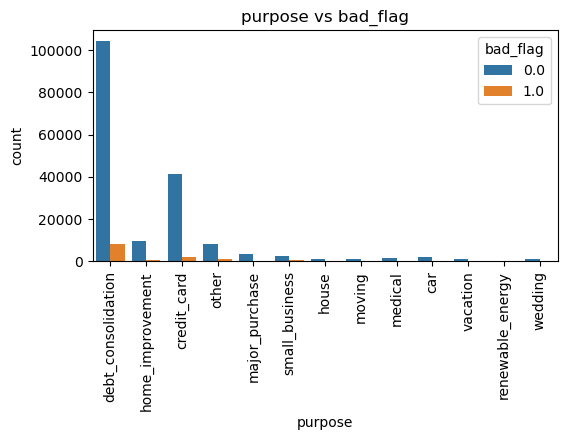

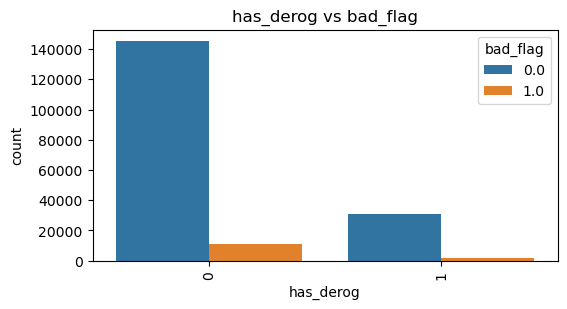

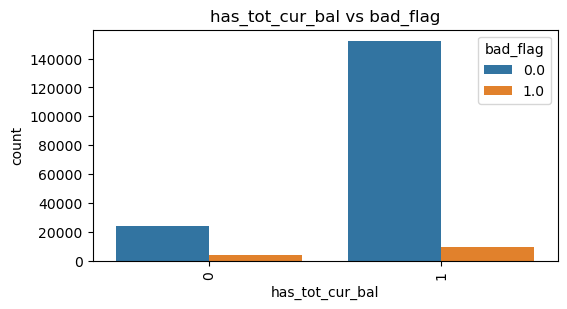

In [23]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue="bad_flag", data=train)
    plt.title(f"{col} vs bad_flag")
    plt.xticks(rotation=90)
    plt.show()

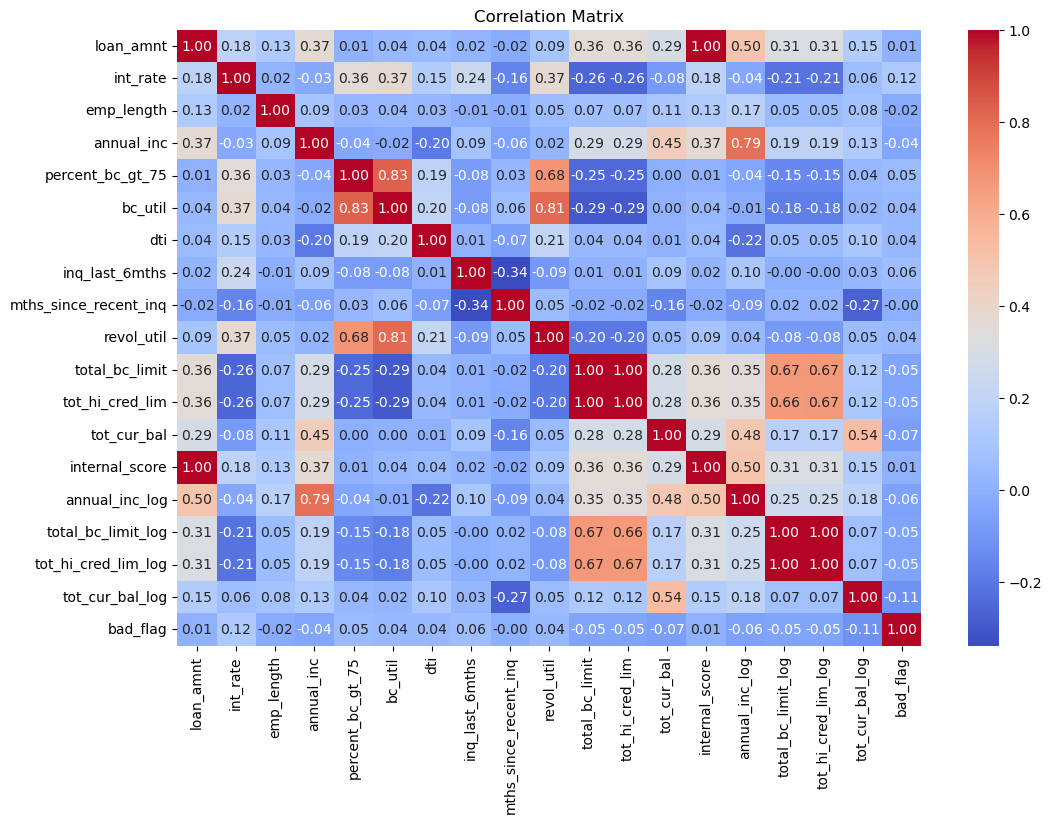

In [24]:
plt.figure(figsize=(12,8))
corr = train[num_cols + ["bad_flag"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## EDA Summary

### 1. Data Quality

#### Missing Values
- **10 columns** have missing values; handled individually:
  1. `mths_since_last_major_derog` (~83% missing) → Created a binary flag `has_derog` to indicate whether the borrower ever had a derogatory mark.
  2. `desc` (~57% missing) → Dropped, as we are not performing NLP analysis.
  3. `mths_since_recent_inq` (~15% missing) → Replaced NaN with a value larger than the maximum observed to indicate “no inquiries.”
  4. `tot_cur_bal` (~15% missing) → Filled NaN with 0 and created a binary flag `has_tot_cur_bal` to indicate no current balance.
  5. Other columns → Filled missing values with **median**.

#### Data Cleaning
- Removed `%` symbols from `int_rate` and `revol_util` columns and converted them to numeric.
- `emp_length` → Cleaned to show years of employment:
  - `"10+ years"` → 10  
  - `"< 1 year"` → 0.5  
  - `NaN` → 0  
  - Other values → Extracted numeric years.
- Dropped columns not needed for modeling: `"id"`, `"member_id"`, `"desc"`, `"mths_since_last_major_derog"`.

#### Outlier Detection & Handling
- Used **IQR method** to detect numeric outliers.
- Applied **log-transform** to heavily skewed financial columns (`annual_inc`, `tot_cur_bal`, `total_bc_limit`, `tot_hi_cred_lim`) to reduce skew.

---

### 2. Insights

1. **Overall default rate**: 6.93%
2. Borrower characteristics associated with higher default risk:
   - Higher interest rate (`int_rate`)  
   - Lower annual income (`annual_inc`)  
   - Higher debt-to-income ratio (`dti`)
3. `int_rate` has the **strongest correlation** with default (`bad_flag`).


### Neural Network Implementation

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

In [26]:
# Identify numeric features (cleaned/log-transformed)
numeric_features = [
    "loan_amnt", "int_rate", "emp_length", "annual_inc_log", "total_bc_limit_log", "tot_hi_cred_lim_log",
    "tot_cur_bal_log", "dti", "revol_util", "percent_bc_gt_75", "bc_util", "inq_last_6mths",
    "mths_since_recent_inq", "internal_score"
]

# Identify categorical features
categorical_features = ["term", "home_ownership", "purpose", "has_derog", "has_tot_cur_bal"]

# Target
target = "bad_flag"

In [27]:
# One-hot encode categorical features
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop first category to avoid dummy trap
X_cat = ohe.fit_transform(train[categorical_features])
cat_cols = ohe.get_feature_names_out(categorical_features)

In [28]:
# Scale numeric features
scaler = StandardScaler()
X_num = scaler.fit_transform(train[numeric_features])

In [29]:
# Final training dataset
X = np.hstack([X_num, X_cat])
y = train[target].values

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=4152, stratify=y
)

In [30]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)

In [31]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [32]:
# Print shapes for confirmation
print("Train shape:", X_train_tensor.shape)
print("Validation shape:", X_val_tensor.shape)
print("Number of features:", X_train_tensor.shape[1])

Train shape: torch.Size([151565, 33])
Validation shape: torch.Size([37892, 33])
Number of features: 33


In [33]:
# Neural Network Architecture
class LoanDefaultNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1=64, hidden_dim2=32, dropout_rate=0.4):
        super(LoanDefaultNN, self).__init__()
        
        # First hidden layer
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        
        # Second hidden layer
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        
        # Output layer (logits)
        self.fc3 = nn.Linear(hidden_dim2, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Instantiate model
input_dim = X_train_tensor.shape[1]
model = LoanDefaultNN(input_dim=input_dim, hidden_dim1=64, hidden_dim2=32, dropout_rate=0.4)

In [34]:
# Weighted loss for imbalance
num_pos = y_train_tensor.sum()
num_neg = len(y_train_tensor) - num_pos
pos_weight = torch.tensor([num_neg / num_pos])
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Adam optimizer with low learning rate
# -> Small lr ensures stable convergence for financial data (I've changed from 0.001 to 0.0005)
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [35]:
# Training loop with early stopping
num_epochs = 500
patience = 5  # stop if no improvement for 5 epochs
best_val_loss = float('inf')
counter = 0

for epoch in range(num_epochs):
    
    # ----------------
    # Training Step
    # ----------------
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # ----------------
    # Validation Step
    # ----------------
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
    
    # ----------------
    # Early Stopping Check
    # ----------------
    if epoch == 0 or val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered")
            break

Epoch 1/500, Train Loss: 1.2922, Val Loss: 1.2901
Epoch 2/500, Train Loss: 1.2909, Val Loss: 1.2890
Epoch 3/500, Train Loss: 1.2897, Val Loss: 1.2878
Epoch 4/500, Train Loss: 1.2885, Val Loss: 1.2867
Epoch 5/500, Train Loss: 1.2873, Val Loss: 1.2856
Epoch 6/500, Train Loss: 1.2861, Val Loss: 1.2846
Epoch 7/500, Train Loss: 1.2849, Val Loss: 1.2835
Epoch 8/500, Train Loss: 1.2838, Val Loss: 1.2825
Epoch 9/500, Train Loss: 1.2827, Val Loss: 1.2814
Epoch 10/500, Train Loss: 1.2815, Val Loss: 1.2804
Epoch 11/500, Train Loss: 1.2804, Val Loss: 1.2794
Epoch 12/500, Train Loss: 1.2793, Val Loss: 1.2783
Epoch 13/500, Train Loss: 1.2781, Val Loss: 1.2773
Epoch 14/500, Train Loss: 1.2770, Val Loss: 1.2762
Epoch 15/500, Train Loss: 1.2758, Val Loss: 1.2751
Epoch 16/500, Train Loss: 1.2746, Val Loss: 1.2740
Epoch 17/500, Train Loss: 1.2734, Val Loss: 1.2729
Epoch 18/500, Train Loss: 1.2722, Val Loss: 1.2718
Epoch 19/500, Train Loss: 1.2709, Val Loss: 1.2706
Epoch 20/500, Train Loss: 1.2697, Val Lo

In [36]:
model.eval()

# Predict probabilities
with torch.no_grad():
    y_val_probs = model(X_val_tensor).detach().cpu().numpy().flatten()

y_true = y_val_tensor.cpu().numpy()

In [37]:
# Threshold Tuning
thresholds = np.arange(0.1, 0.55, 0.05)
for t in thresholds:
    y_pred = (y_val_probs >= t).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    roc_auc = roc_auc_score(y_true, y_val_probs)
    print(f"Threshold: {t:.2f}, Recall: {recall:.3f}, Precision: {precision:.3f}, ROC-AUC: {roc_auc:.3f}")

Threshold: 0.10, Recall: 0.604, Precision: 0.124, ROC-AUC: 0.696
Threshold: 0.15, Recall: 0.583, Precision: 0.127, ROC-AUC: 0.696
Threshold: 0.20, Recall: 0.563, Precision: 0.131, ROC-AUC: 0.696
Threshold: 0.25, Recall: 0.538, Precision: 0.135, ROC-AUC: 0.696
Threshold: 0.30, Recall: 0.512, Precision: 0.138, ROC-AUC: 0.696
Threshold: 0.35, Recall: 0.480, Precision: 0.140, ROC-AUC: 0.696
Threshold: 0.40, Recall: 0.451, Precision: 0.144, ROC-AUC: 0.696
Threshold: 0.45, Recall: 0.422, Precision: 0.147, ROC-AUC: 0.696
Threshold: 0.50, Recall: 0.397, Precision: 0.152, ROC-AUC: 0.696


### Business Interpretation of Threshold Trade-Offs

1. **Low threshold (0.1–0.2)**  
   - The model catches more bad loans, which protects the bank from losses.  
   - But it also wrongly rejects many good borrowers, which means lost revenue and customer dissatisfication.  

2. **High threshold (0.4–0.5)**  
   - The model approves more good borrowers, leading to higher approval rates and more revenue.  
   - But more bad borrowers get approved, which increases the risk of defaults.  

3. **Middle threshold (0.25–0.35)**  
   - A balanced range that still blocks a good share of bad loans while improving precision.  
   - From a business view, it avoids being too strict but still reduces risk in a meaningful way.  

**Final choice: threshold = 0.3**  
This was chosen as a middle ground, balancing the need to reduce defaults without rejecting too many good borrowers.


In [38]:
# Final choice: threshold = 0.3
# -> Balance between catching defaults (recall) and avoiding too many false positives
chosen_threshold = 0.3
y_val_pred = (y_val_probs >= chosen_threshold).astype(int)

In [39]:
cm = confusion_matrix(y_val_tensor.numpy(), y_val_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[26871  8395]
 [ 1281  1345]]


In [40]:
# Get probabilities of the positive class
y_probs = y_val_probs  # already predicted probabilities from model

# Compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_val_tensor.numpy(), y_probs)

# Compute the AUC
roc_auc = auc(fpr, tpr)

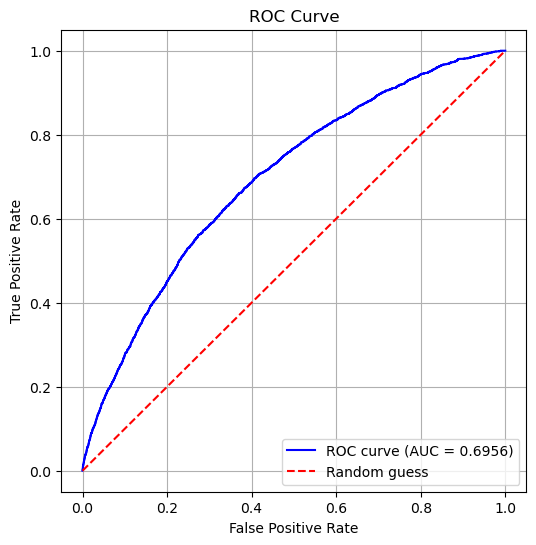

In [42]:
# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [43]:
# Preprocess test dataset
test = pd.read_csv("testing_loan_data.csv")
test.head()

C:\Users\shawn_liao\AppData\Local\Temp\ipykernel_13952\3238875909.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("testing_loan_data.csv")


,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,20000001,22419852,10000,36 months,22.15%,8 years,RENT,37000.0,NaN,debt_consolidation,...,1,3.0,73.10%,16200,NaN,14877.170280,36809,1,131,NaN
1,20000002,22349118,1400,36 months,18.24%,6 years,RENT,41000.0,NaN,other,...,0,9.0,11.50%,4000,NaN,4097.304770,19536,1,19,NaN
2,20000003,22398818,7000,36 months,12.49%,3 years,RENT,68900.0,NaN,debt_consolidation,...,0,11.0,48.10%,11900,80.0,12688.495160,241465,1,92,NaN
3,20000004,22419015,18000,60 months,16.29%,9 years,MORTGAGE,41000.0,NaN,debt_consolidation,...,1,0.0,38.10%,7600,73.0,7908.799817,179757,1,235,NaN
4,20000005,22388614,12000,36 months,12.99%,10+ years,MORTGAGE,64000.0,NaN,home_improvement,...,0,NaN,57.90%,21000,NaN,19378.561060,31953,1,157,NaN


In [44]:
# Apply the same feature engineering as training
test["emp_length"] = test["emp_length"].apply(clean_emp_length)
test["has_derog"] = test["mths_since_last_major_derog"].notnull().astype(int)    
test["mths_since_recent_inq"] = test["mths_since_recent_inq"].fillna(99)
test["has_tot_cur_bal"] = test["tot_cur_bal"].notnull().astype(int)
test["tot_cur_bal"] = test["tot_cur_bal"].fillna(0)
test["int_rate"] = test["int_rate"].str.replace('%', '', regex=False).astype(float)
test["term"] = test["term"].str.extract(r'(\d+)').astype(int)
test["revol_util"] = test["revol_util"].str.replace('%', '', regex=False).astype(float)

test = test.drop(columns=["id", "member_id", "desc", "mths_since_last_major_derog"])

# Fill missing values with training medians
for col in ["percent_bc_gt_75", "bc_util", "revol_util", "total_bc_limit", "tot_hi_cred_lim"]:
    median_val = train[col].median()
    test[col] = test[col].fillna(median_val)

# Log-transform for the same features in training dataset
for col in log_cols:
    test[col + "_log"] = np.log1p(test[col])

In [45]:
# Convert to PyTorch tensor
X_test_cat = ohe.transform(test[categorical_features])
X_test_num = scaler.transform(test[numeric_features])
X_test_combined = np.hstack([X_test_num, X_test_cat])
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)

In [46]:
model.eval()
with torch.no_grad():
    probs_test = model(X_test_tensor).numpy().flatten()  # predicted probabilities

# Apply threshold
threshold = 0.3
y_test_pred = (probs_test >= threshold).astype(int)

In [48]:
# Inference on the test dataset
submission = pd.read_csv("testing_loan_data.csv")

C:\Users\shawn_liao\AppData\Local\Temp\ipykernel_13952\184263888.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  submission = pd.read_csv("testing_loan_data.csv")


In [49]:
submission["bad_flag"] = y_test_pred

# Save the updated DataFrame back to CSV
submission.to_csv("test_result.csv", index=False)